#Word Generator using generated Context Probability



###Import libraries and Mount drive

In [ ]:
import nltk
import re
import unicodedata
import string
from google.colab import drive
drive.mount('/content/drive/')
path = "/content/drive/MyDrive/1661-0.txt"
text = open(path).read().lower()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


###Text Pre-processing

In [ ]:
text = (unicodedata.normalize('NFKD',text).encode('ascii', 'ignore').decode('utf-8', 'ignore'))

In [ ]:
text = re.sub('\n', ' ', text)

In [ ]:
text = re.sub(r'\s+', ' ', text)

In [ ]:
text_list = re.split('[?!.,]', text)

In [ ]:
text_list = [x.lower().translate(str.maketrans(' ', ' ', string.punctuation)).strip() for x in text_list]

In [ ]:
new_list = list(filter(None, text_list))

In [ ]:
new_list

['project gutenbergs the adventures of sherlock holmes',
 'by arthur conan doyle this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever',
 'you may copy it',
 'give it away or reuse it under the terms of the project gutenberg license included with this ebook or online at www',
 'gutenberg',
 'net title the adventures of sherlock holmes author arthur conan doyle release date november 29',
 '2002 ebook 1661 last updated may 20',
 '2019 language english character set encoding utf8  start of this project gutenberg ebook the adventures of sherlock holmes  produced by an anonymous project gutenberg volunteer and jose menendez cover the adventures of sherlock holmes by arthur conan doyle contents i',
 'a scandal in bohemia ii',
 'the redheaded league iii',
 'a case of identity iv',
 'the boscombe valley mystery v',
 'the five orange pips vi',
 'the man with the twisted lip vii',
 'the adventure of the blue carbuncle viii',
 'the adventure of the spe

###POS tagging the whole text, using spacy library

In [ ]:
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
for token in nlp('offices of the league 7 popes court fleet street'):
  print(token.text, token.pos_, sep=" ")

offices NOUN
of ADP
the DET
league NOUN
7 NUM
popes NOUN
court PROPN
fleet PROPN
street PROPN


In [ ]:
pos_list = []
text_list_2 = []
for sentence in text_list:
  pos = []
  t = []
  for token in nlp(sentence):
    pos.append(token.pos_)
    t.append(token.text)
  pos_list.append(pos)
  text_list_2.append(t)

In [ ]:
pos_list_2 = []
for pos in pos_list:
  trigrams = list(nltk.ngrams(pos, 3))
  pos_list_2.extend(trigrams)

In [ ]:
text_list_3 = []
for t in text_list_2:
  trigrams = list(nltk.ngrams(t, 3))
  text_list_3.extend(trigrams)

In [ ]:
pos_list_2

[('NOUN', 'VERB', 'DET'),
 ('VERB', 'DET', 'NOUN'),
 ('DET', 'NOUN', 'ADP'),
 ('NOUN', 'ADP', 'NOUN'),
 ('ADP', 'NOUN', 'NOUN'),
 ('ADP', 'PROPN', 'PROPN'),
 ('PROPN', 'PROPN', 'NOUN'),
 ('PROPN', 'NOUN', 'DET'),
 ('NOUN', 'DET', 'NOUN'),
 ('DET', 'NOUN', 'AUX'),
 ('NOUN', 'AUX', 'ADP'),
 ('AUX', 'ADP', 'DET'),
 ('ADP', 'DET', 'NOUN'),
 ('DET', 'NOUN', 'ADP'),
 ('NOUN', 'ADP', 'PRON'),
 ('ADP', 'PRON', 'ADV'),
 ('PRON', 'ADV', 'ADP'),
 ('ADV', 'ADP', 'DET'),
 ('ADP', 'DET', 'NOUN'),
 ('DET', 'NOUN', 'CCONJ'),
 ('NOUN', 'CCONJ', 'ADP'),
 ('CCONJ', 'ADP', 'ADV'),
 ('ADP', 'ADV', 'PRON'),
 ('ADV', 'PRON', 'NOUN'),
 ('PRON', 'NOUN', 'ADV'),
 ('PRON', 'AUX', 'VERB'),
 ('AUX', 'VERB', 'PRON'),
 ('VERB', 'PRON', 'ADV'),
 ('PRON', 'ADV', 'CCONJ'),
 ('ADV', 'CCONJ', 'VERB'),
 ('CCONJ', 'VERB', 'PRON'),
 ('VERB', 'PRON', 'ADP'),
 ('PRON', 'ADP', 'DET'),
 ('ADP', 'DET', 'NOUN'),
 ('DET', 'NOUN', 'ADP'),
 ('NOUN', 'ADP', 'DET'),
 ('ADP', 'DET', 'NOUN'),
 ('DET', 'NOUN', 'PROPN'),
 ('NOUN', 'PROPN'

Showing the most dominant prbabilites from the rule book created

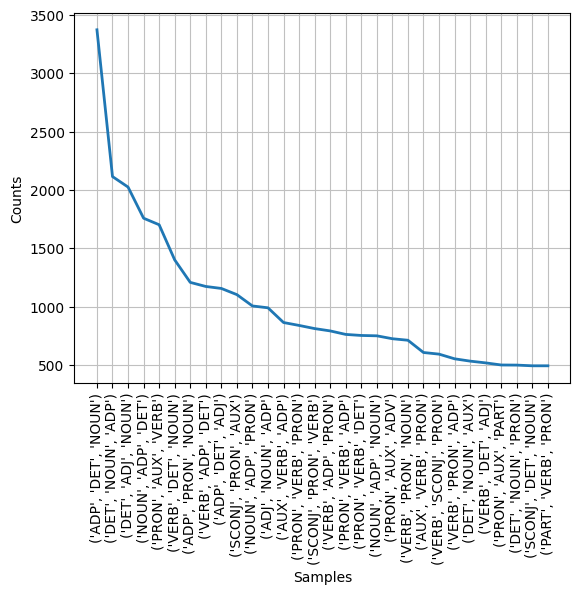

Most common trigrams:  [(('ADP', 'DET', 'NOUN'), 3373), (('DET', 'NOUN', 'ADP'), 2115), (('DET', 'ADJ', 'NOUN'), 2025), (('NOUN', 'ADP', 'DET'), 1758), (('PRON', 'AUX', 'VERB'), 1702)]


In [ ]:
freq_tri = nltk.FreqDist(pos_list_2)
freq_tri.plot(30, cumulative=False)
print("Most common trigrams: ", freq_tri.most_common(5))

**cfdist** is the rule book

In [ ]:
import math

In [ ]:
cfdist = nltk.ConditionalFreqDist()
for w1, w2, w3 in pos_list_2:
  cfdist[(w1, w2)][w3] += 1

In [ ]:
for w1_w2 in cfdist:
  total_count = float(sum(cfdist[w1_w2].values()))
  for w3 in cfdist[w1_w2]:
    cfdist[w1_w2][w3] /= total_count

### Making Data set, with previous words and POS tag of the word to be generated

In [ ]:
import pandas as pd

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
data = []
for i in range(len(text_list_3)):
  words = text_list_3[i]
  tags = pos_list_2[i]
  row = {'word': words[2], 'pos': tags[2], 'prev1': words[0], 'prev2': words[1]}
  data.append(row)

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,word,pos,prev1,prev2
0,the,DET,project,gutenbergs
1,adventures,NOUN,gutenbergs,the
2,of,ADP,the,adventures
3,sherlock,NOUN,adventures,of
4,holmes,NOUN,of,sherlock
...,...,...,...,...
79424,to,PART,email,newsletter
79425,hear,VERB,newsletter,to
79426,about,ADP,to,hear
79427,new,ADJ,hear,about


In [ ]:
#df.to_csv('/content/drive/MyDrive/tagged_df.csv', index=False)

### Tokenising and Making word vocab for the Dataset made and cleaning it a bit more

In [ ]:
import pandas as pd
from keras.preprocessing.text import Tokenizer

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/tagged_df.csv')

In [ ]:
tokenizer1 = Tokenizer(oov_token="<OOV>")

tokenizer1.fit_on_texts(df2["pos"])
vocab_pos = tokenizer1.word_index
word_sequences = tokenizer1.texts_to_sequences(df2["pos"])
df2['pos'] = [item for sublist in word_sequences for item in sublist]

tokenizer2 = Tokenizer(oov_token="<OOV>")
tokenizer2.fit_on_texts(df2["prev1"])
vocab_prev1 = tokenizer2.word_index
df2['prev1'] = tokenizer2.texts_to_sequences(df2["prev1"])

tokenizer3 = Tokenizer(oov_token="<OOV>")
tokenizer3.fit_on_texts(df2["prev2"])
vocab_prev2 = tokenizer3.word_index
df2['prev2'] = tokenizer3.texts_to_sequences(df2["prev2"])

df2

,word,pos,prev1,prev2
0,the,6,[106],[3594]
1,adventures,2,[3394],[2]
2,of,3,[2],[815]
3,sherlock,2,[828],[3]
4,holmes,2,[6],[188]
...,...,...,...,...
79424,to,11,[2280],[7066]
79425,hear,4,[6723],[4]
79426,about,3,[5],[264]
79427,new,7,[265],[73]


In [ ]:
mask = df2["prev1"].apply(lambda x: len(x) > 0)
df2 = df2.loc[mask]
mask = df2["prev2"].apply(lambda x: len(x) > 0)
df2 = df2.loc[mask]
df2

,word,pos,prev1,prev2
0,the,6,[106],[3594]
1,adventures,2,[3394],[2]
2,of,3,[2],[815]
3,sherlock,2,[828],[3]
4,holmes,2,[6],[188]
...,...,...,...,...
79424,to,11,[2280],[7066]
79425,hear,4,[6723],[4]
79426,about,3,[5],[264]
79427,new,7,[265],[73]


In [ ]:
df2['prev2']  = [item for sublist in df2['prev2'] for item in sublist]
df2['prev1']  = [item for sublist in df2['prev1'] for item in sublist]

In [ ]:
mask = df2["word"].apply(lambda x: x.strip())
df2 = df2[mask != '']

In [ ]:
tokenizer4 = Tokenizer(oov_token="<OOV>")
tokenizer4.fit_on_texts(df2["word"])
vocab_word = tokenizer4.word_index

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data_word = df2["word"].dropna().values
ohe = OneHotEncoder(categories=[list(vocab_word.keys())], sparse_output=True)
data_word_onehot = []

In [ ]:
data_word_onehot_2 = ohe.fit_transform(data_word.reshape(-1,1))

### Making model

In [ ]:
from keras.layers import Embedding, Input, Concatenate, Dense, Flatten
from keras.models import Model
from sklearn.model_selection import train_test_split

In [ ]:
from keras.layers import LSTM, Dropout, Reshape, Bidirectional

In [ ]:
input_prev1 = Input(shape=(1,), dtype="int32")
input_prev2 = Input(shape=(1,), dtype="int32")
input_pos = Input(shape=(1,), dtype="int32")

embedding_prev1 = Dense(64)(input_prev1)
embedding_prev2 = Dense(64)(input_prev2)
embedding_pos = Dense(64)(input_pos)

concatenated = Concatenate()([embedding_prev1, embedding_prev2, embedding_pos])
reshaped = Reshape((-1, 192))(concatenated)

lstm_layer1 = Bidirectional(LSTM(128, return_sequences=True))(reshaped)
lstm_layer2 = LSTM(128)(lstm_layer1)

dense_layer1 = Dense(128, activation="relu")(lstm_layer2)
dropout_layer1 = Dropout(0.2)(dense_layer1)
dense_layer2 = Dense(64, activation="relu")(dropout_layer1)
dropout_layer2 = Dropout(0.2)(dense_layer2)
dense_layer3 = Dense(32, activation="relu")(dropout_layer2)

output_layer = Dense(len(vocab_word.keys()), activation="softmax")(dense_layer3)

model2 = Model(inputs=[input_pos, input_prev1, input_prev2], outputs=output_layer)

model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           128         ['input_1[0][0]']                
                                                                                              

###Fitting the model

One hot encoding the data word, for classification task

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df2[['pos','prev1','prev2']], data_word_onehot_2, test_size=0.2)

Fitting the data into the model

In [ ]:
model2.fit([df2["prev1"].values, df2["prev2"].values, df2["pos"].values], data_word_onehot_2.toarray(), epochs=80, batch_size=64, validation_data=([X_val["prev1"].values, X_val["prev2"].values, X_val["pos"].values], y_val.toarray()))

Epoch 1/80
1241/1241 [==============================] - 61s 42ms/step - loss: 6.7739 - accuracy: 0.0645 - val_loss: 6.4626 - val_accuracy: 0.0741
Epoch 2/80
1241/1241 [==============================] - 48s 39ms/step - loss: 6.4276 - accuracy: 0.0763 - val_loss: 6.2246 - val_accuracy: 0.0847
Epoch 3/80
1241/1241 [==============================] - 48s 39ms/step - loss: 6.0527 - accuracy: 0.0948 - val_loss: 5.6086 - val_accuracy: 0.1080
Epoch 4/80
1241/1241 [==============================] - 48s 39ms/step - loss: 5.3892 - accuracy: 0.1219 - val_loss: 5.0315 - val_accuracy: 0.1343
Epoch 5/80
1241/1241 [==============================] - 47s 38ms/step - loss: 4.9630 - accuracy: 0.1408 - val_loss: 4.7931 - val_accuracy: 0.1403
Epoch 6/80
1241/1241 [==============================] - 47s 38ms/step - loss: 4.7703 - accuracy: 0.1527 - val_loss: 4.6165 - val_accuracy: 0.1599
Epoch 7/80
1241/1241 [==============================] - 48s 39ms/step - loss: 4.6665 - accuracy: 0.1627 - val_loss: 4.5409 -

###Predicting and Saving the model

In [ ]:
pred = model2.predict([X_val["prev1"].values, X_val["prev2"].values, X_val["pos"].values])

497/497 [==============================] - 14s 13ms/step


In [ ]:
pred

array([[1.9544611e-12, 1.1465558e-12, 6.6542506e-01, ..., 2.9263182e-17,
        3.9281237e-20, 1.6864844e-19],
       [2.7745429e-11, 2.1602433e-11, 2.1031857e-11, ..., 1.7110104e-14,
        4.7018075e-13, 4.1241809e-11],
       [5.7812154e-12, 6.0180290e-12, 1.0125741e-11, ..., 6.2579551e-22,
        2.0770296e-18, 1.0383132e-20],
       ...,
       [2.8003365e-11, 1.9053996e-11, 4.9791655e-01, ..., 1.2674177e-13,
        4.3800651e-20, 8.7209730e-20],
       [5.6580870e-08, 5.8975012e-08, 2.8092496e-04, ..., 8.8286658e-09,
        8.9233773e-11, 2.8483835e-09],
       [7.8407334e-09, 7.4648883e-09, 1.0295110e-01, ..., 3.2117430e-08,
        2.7088554e-11, 5.2829620e-08]], dtype=float32)

In [ ]:
import pickle

model2.save('/content/drive/MyDrive/model_2_3.h5')

In [ ]:
pred

###Loading the made model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_res = load_model('/content/drive/MyDrive/model_2_3.h5')

#result = model_res.predict([X_val["pos"].values, X_val["prev1"].values, X_val["prev2"].values])

497/497 [==============================] - 6s 9ms/step


### Input and predicting the word

In [ ]:
text = input("Write 2 words to begin new word generation :")

Write 2 words to begin new word generation :this is


In [ ]:
text = (unicodedata.normalize('NFKD',text).encode('ascii', 'ignore').decode('utf-8', 'ignore'))
text = re.sub('\n', ' ', text)
text = re.sub(r'\s+', ' ', text)
text_list = re.split('[?!.,]', text)
text_list = [x.lower().translate(str.maketrans(' ', ' ', string.punctuation)).strip() for x in text_list]

In [ ]:
def predict_word(prev_words):
  w_w = {}
  for key, prob in dict(cfdist[prev_words[0], prev_words[1]]).items():
    w_w[key] = prob
  sorted_items = sorted(w_w.items(), key=lambda x: x[1], reverse=True)
  top_3_items = sorted_items[:3]
  result_dict = dict(top_3_items)
  return result_dict

In [ ]:
prev_pos = []
prev_text = []
for token in nlp(text_list[0]):
  prev_pos.append(token.pos_)
  prev_text.append(token.text)

In [ ]:
pos_tag_new = predict_word(prev_pos)

In [ ]:
pos_tag_new

{'VERB': 0.37048323900740093,
 'ADV': 0.15781454070526774,
 'PART': 0.108837614279495}

In [ ]:
import numpy as np
a = np.repeat(np.array(prev_text[0], dtype=str), 3)
b = np.repeat(np.array(prev_text[1], dtype=str), 3)
c = np.array(list(pos_tag_new.keys()), dtype=str)

In [ ]:
c = np.array(tokenizer1.texts_to_sequences(c.reshape(-1))).reshape(-1)
a = np.array(tokenizer2.texts_to_sequences(a.reshape(-1))).reshape(-1)
b = np.array(tokenizer3.texts_to_sequences(b.reshape(-1))).reshape(-1)

In [ ]:
pred = model_res.predict([a,b,c])

1/1 [==============================] - 0s 28ms/step


In [ ]:
for p in pred:
  t = [[key,value] for key, value in vocab_word.items() if value == np.argmax(p)]
  print(t)

[['me', 23]]
[['so', 44]]
[['her', 32]]


###Conclusion:
* There is need for better data
* Overall seems like a reliable approach
* Model does need finetuning, but more than that we need more distinct dataset
